In [28]:
# first, some common imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import pearsonr
%matplotlib inline

In [29]:
charmeta = pd.read_csv('../models/newgendermodel.csv')
charmeta.head()

,volid,dateused,pubdate,birthdate,firstpub,gender,nation,allwords,logistic,realclass,trainflag,trainsize,author,title,genretags
0,pst.000018729719|Jody,1963,1963,0,1963,gender,NaN,35.782609,0.832789,1,1,"Plath, Sylvia",The Bell Jar,f | lower,NaN
1,pst.000029131198|MademoiselleMaillard,1938,1938,0,1938,gender,NaN,29.000000,0.679223,1,1,"Field, Rachel",All This and Heaven Too,f | lower,NaN
2,uc1.32106005120107|Mrs.Neale,1907,1907,0,1907,gender,NaN,13.500000,0.591460,1,1,"Conrad, Joseph",The Secret Agent,f | lower,NaN
3,uc1.32106002105341|Billy,1930,1930,0,1930,gender,NaN,21.000000,0.175941,0,1,"Faulkner, William",As I Lay Dying,lower | m,NaN
4,uc1.32106002105341|Eustace,1930,1930,0,1930,gender,NaN,14.333333,0.816572,0,1,"Faulkner, William",As I Lay Dying,lower | m,NaN


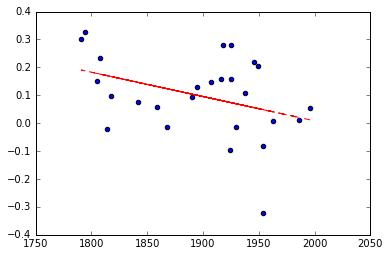

Pearson's R (-0.37394259110258399, 0.059850548669741849)


In [30]:
x = []
y = []
titles = []

grouped = charmeta.groupby('author')
for author, group in grouped:
    date = np.mean(group.dateused)
    upperarray = group.loc[group.realclass == 1, 'logistic']
    upper = np.mean(upperarray[~np.isnan(upperarray)])
    lowerarray = group.loc[group.realclass == 0, 'logistic']
    lower = np.mean(lowerarray[~np.isnan(lowerarray)])
    difference = upper - lower
    if not np.isnan(difference):
        x.append(date)
        y.append(upper - lower)
        titles.append((upper-lower, author))

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()
print("Pearson's R", pearsonr(x, y))  

In [31]:
titles.sort()
titles

[(-0.32023322896688894, 'The Fellowship of the Ring'),
 (-0.095376491943833408, 'False Dawn (The Forties)'),
 (-0.082817978332000108, 'Lucky Jim'),
 (-0.019140867474200074, 'Waverley'),
 (-0.014309998550089964, 'As I Lay Dying'),
 (-0.013660962697500056, 'Robert Falconer'),
 (0.0094190521073149736, 'The Bell Jar'),
 (0.0098907479929999931, 'Neuromancer'),
 (0.05313671105962503, 'A Game of Thrones'),
 (0.058807847925896994, 'Adam Bede'),
 (0.077762403899645949, 'Lady Anne Granard, or, Keeping up appearances'),
 (0.094310453214499934, 'The Picture of Dorian Gray'),
 (0.099035767006000086, 'Frankenstein'),
 (0.10855098080679987, 'All This and Heaven Too'),
 (0.13002659593239996, 'The Time Machine'),
 (0.14701042870266678, 'The Secret Agent'),
 (0.1494626293322, 'Thaddeus of Warsaw'),
 (0.15824425973627276, 'Mrs. Dalloway'),
 (0.15929397098300002, 'A Portrait of the Artist as a Young Man'),
 (0.20505268392250009, 'Nineteen-eighty Four'),
 (0.21784930807766667, 'The Stranger'),
 (0.23531337